In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv("./data/통신고객이탈.csv", encoding = '949')
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [5]:
df_raw.dtypes

CHURN                  object
CUSTOMER_ID            object
GENDER                 object
AGE                     int64
CHARGE_TYPE            object
HANDSET                object
USAGE_BAND             object
SERVICE_DURATION      float64
DROPPED_CALLS           int64
PEAK_CALLS_NO           int64
PEAK_CALLS_TIME       float64
WEEKEND_CALLS_NO        int64
WEEKEND_CALLS_TIME    float64
TOTAL_CALLS_NO          int64
TOTAL_CALLS_TIME      float64
dtype: object

In [8]:
df_raw_y = df_raw['CHURN']
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_x.head()

,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [11]:
df_raw_dummy_x = pd.get_dummies(df_raw_x)
df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID_K100420,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,0,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (651, 963)
train data Y size : (651,)
test data X size : (279, 963)
test data Y size : (279,)


In [13]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on trainning set : 0.989
Score on test set : 0.867


In [14]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [20]:
para_depth = [n_leaf for n_leaf in range(1,15)]
para_leaf = [n_leaf * 10 for n_leaf in range(1,15)]

estimator = RandomForestClassifier(n_estimators=100, random_state=1234)
param_grid = {'max_depth':para_depth,
             'min_samples_leaf':para_leaf}


grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)
print('best estimator model: \n{}'.format(grid_rf.best_estimator_))
print('\n best parameter: \n{}'.format(grid_rf.best_params_))
print('\n best score: \n{}'.format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

 best parameter: 
{'max_depth': 1, 'min_samples_leaf': 10}

 best score: 
0.791


In [15]:
train_accuracy = [];test_accuracy=[]
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234, 
                                 n_estimators = v_n_estimators)
    
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.989,0.867
1,20,0.998,0.882
2,30,0.998,0.878
3,40,1.000,0.882
4,50,1.000,0.892
5,60,1.000,0.892
6,70,1.000,0.896
7,80,1.000,0.896
8,90,1.000,0.892
9,100,1.000,0.892


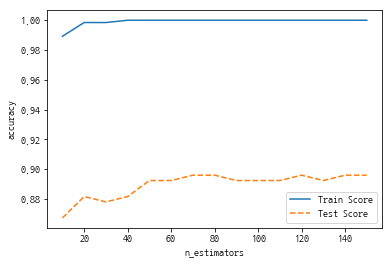

In [16]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test Score')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

In [21]:
n_estimators = 70

In [26]:
train_accuracy = [];test_accuracy=[]
para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    tree = RandomForestClassifier(random_state = 1234, 
                                 n_estimators = 70,
                                 max_depth = v_max_depth)
    
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.791,0.842
1,2,0.791,0.842
2,3,0.791,0.842
3,4,0.791,0.842
4,5,0.793,0.842
5,6,0.800,0.842
6,7,0.808,0.846
7,8,0.814,0.846
8,9,0.822,0.849
9,10,0.848,0.853


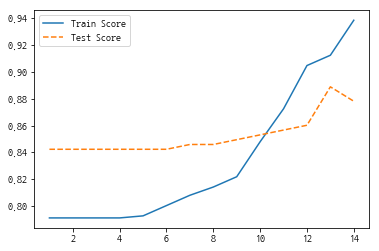

In [27]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Score')
plt.legend()

In [38]:
train_accuracy = [];test_accuracy=[]
para_split = [n_split*2 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state = 1234, 
                                 n_estimators = 70,
                                 max_depth = 13,
                                 min_samples_split = v_min_samples_split)
    
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split['gap'] = np.array(np.array(train_accuracy)-np.array(test_accuracy))
df_accuracy_split.round(3)

,split,TrainAccuracy,TestAccuracy,gap
0,2,0.912,0.889,0.024
1,4,0.912,0.875,0.038
2,6,0.906,0.864,0.042
3,8,0.888,0.860,0.028
4,10,0.883,0.849,0.034
5,12,0.883,0.849,0.034
6,14,0.883,0.860,0.023
7,16,0.880,0.864,0.016
8,18,0.871,0.860,0.011
9,20,0.856,0.860,-0.005


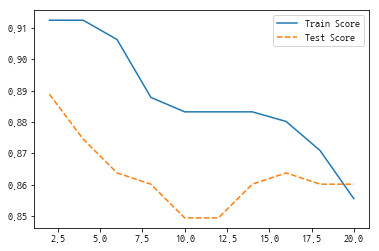

In [33]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Score')
plt.legend()

In [46]:
train_accuracy = [];test_accuracy=[]
para_leaf = [n_leaf for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, 
                                 n_estimators = 70,
                                 max_depth = 13,
                                 min_samples_split = 16,
                                 min_samples_leaf = v_min_samples_leaf)
    
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,leaf,TrainAccuracy,TestAccuracy
0,1,0.880,0.864
1,2,0.791,0.842
2,3,0.791,0.842
3,4,0.791,0.842
4,5,0.791,0.842
5,6,0.791,0.842
6,7,0.791,0.842
7,8,0.791,0.842
8,9,0.791,0.842
9,10,0.791,0.842


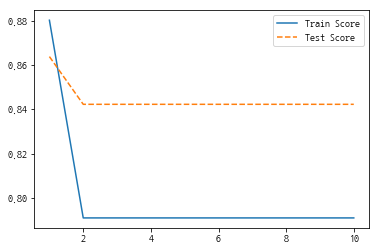

In [47]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Score')
plt.legend()

In [ ]:
rf_final = RandomForestClassifier(random_state = 1234, 
                                 n_estimators = 100,
                                 max_depth = 4,
                                 min_samples_leaf = 20)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print('Accuacy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Accuacy on ttest set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
